In [1]:
from pymongo import MongoClient
import pandas as pd

In [2]:
client = MongoClient('mongodb://127.0.0.1:27017')

In [3]:
db= client['video_analytics']

In [4]:
db.list_collection_names()

['webcam1', 'mbean2', 'cropped']

In [5]:
cropped_vid_collecetion= db['cropped']

In [6]:
cursor= cropped_vid_collecetion.find()
df =  pd.DataFrame(list(cursor))

In [7]:
df= df.drop(columns= ['_id'])
df.tail()

,position,bbox,time,class,frameNumber,idd,detectorName
4486,"[718, 447]","[658, 394, 778, 500]",2021-02-03 14:28:31.377,person,647,343,yoloAllObject
4487,"[172, 348]","[129, 296, 215, 400]",2021-02-03 14:28:31.377,person,647,341,yoloAllObject
4488,"[855, 437]","[807, 364, 903, 510]",2021-02-03 14:28:31.377,person,647,344,yoloAllObject
4489,"[1145, 466]","[1090, 408, 1201, 524]",2021-02-03 14:28:31.377,person,647,333,yoloAllObject
4490,"[1220, 435]","[1171, 365, 1269, 506]",2021-02-03 14:28:31.377,person,647,323,yoloAllObject


In [8]:
df.sort_values('frameNumber',inplace=True)
df

,position,bbox,time,class,frameNumber,idd,detectorName
0,"[1148, 601]","[868, 156, 1429, 1046]",2021-02-03 14:01:01.755,person,1,0,yoloAllObject
1,"[1608, 615]","[1378, 168, 1839, 1062]",2021-02-03 14:01:01.755,person,1,1,yoloAllObject
2,"[1830, 595]","[1726, 149, 1934, 1041]",2021-02-03 14:01:01.755,person,1,2,yoloAllObject
3,"[52, 570]","[13, 516, 92, 624]",2021-02-03 14:01:01.755,person,1,3,yoloAllObject
4,"[495, 606]","[104, 159, 887, 1054]",2021-02-03 14:01:01.755,person,1,4,yoloAllObject
...,...,...,...,...,...,...,...
4485,"[1313, 429]","[1251, 357, 1376, 501]",2021-02-03 14:28:31.377,person,647,314,yoloAllObject
4486,"[718, 447]","[658, 394, 778, 500]",2021-02-03 14:28:31.377,person,647,343,yoloAllObject
4487,"[172, 348]","[129, 296, 215, 400]",2021-02-03 14:28:31.377,person,647,341,yoloAllObject
4488,"[855, 437]","[807, 364, 903, 510]",2021-02-03 14:28:31.377,person,647,344,yoloAllObject


# Counting

In [9]:
df_= df.drop(columns= ['position', 'bbox', 'idd', 'detectorName'])
df_

,time,class,frameNumber
0,2021-02-03 14:01:01.755,person,1
1,2021-02-03 14:01:01.755,person,1
2,2021-02-03 14:01:01.755,person,1
3,2021-02-03 14:01:01.755,person,1
4,2021-02-03 14:01:01.755,person,1
...,...,...,...
4485,2021-02-03 14:28:31.377,person,647
4486,2021-02-03 14:28:31.377,person,647
4487,2021-02-03 14:28:31.377,person,647
4488,2021-02-03 14:28:31.377,person,647


In [10]:
all_obj_counts= df_.groupby(by=['frameNumber']).count()['class']
all_obj_counts

frameNumber
1       8
2       7
3       7
4       6
5       6
       ..
643    11
644    11
645    12
646    11
647    11
Name: class, Length: 647, dtype: int64

Text(0.5, 1.0, 'object count wrt time')

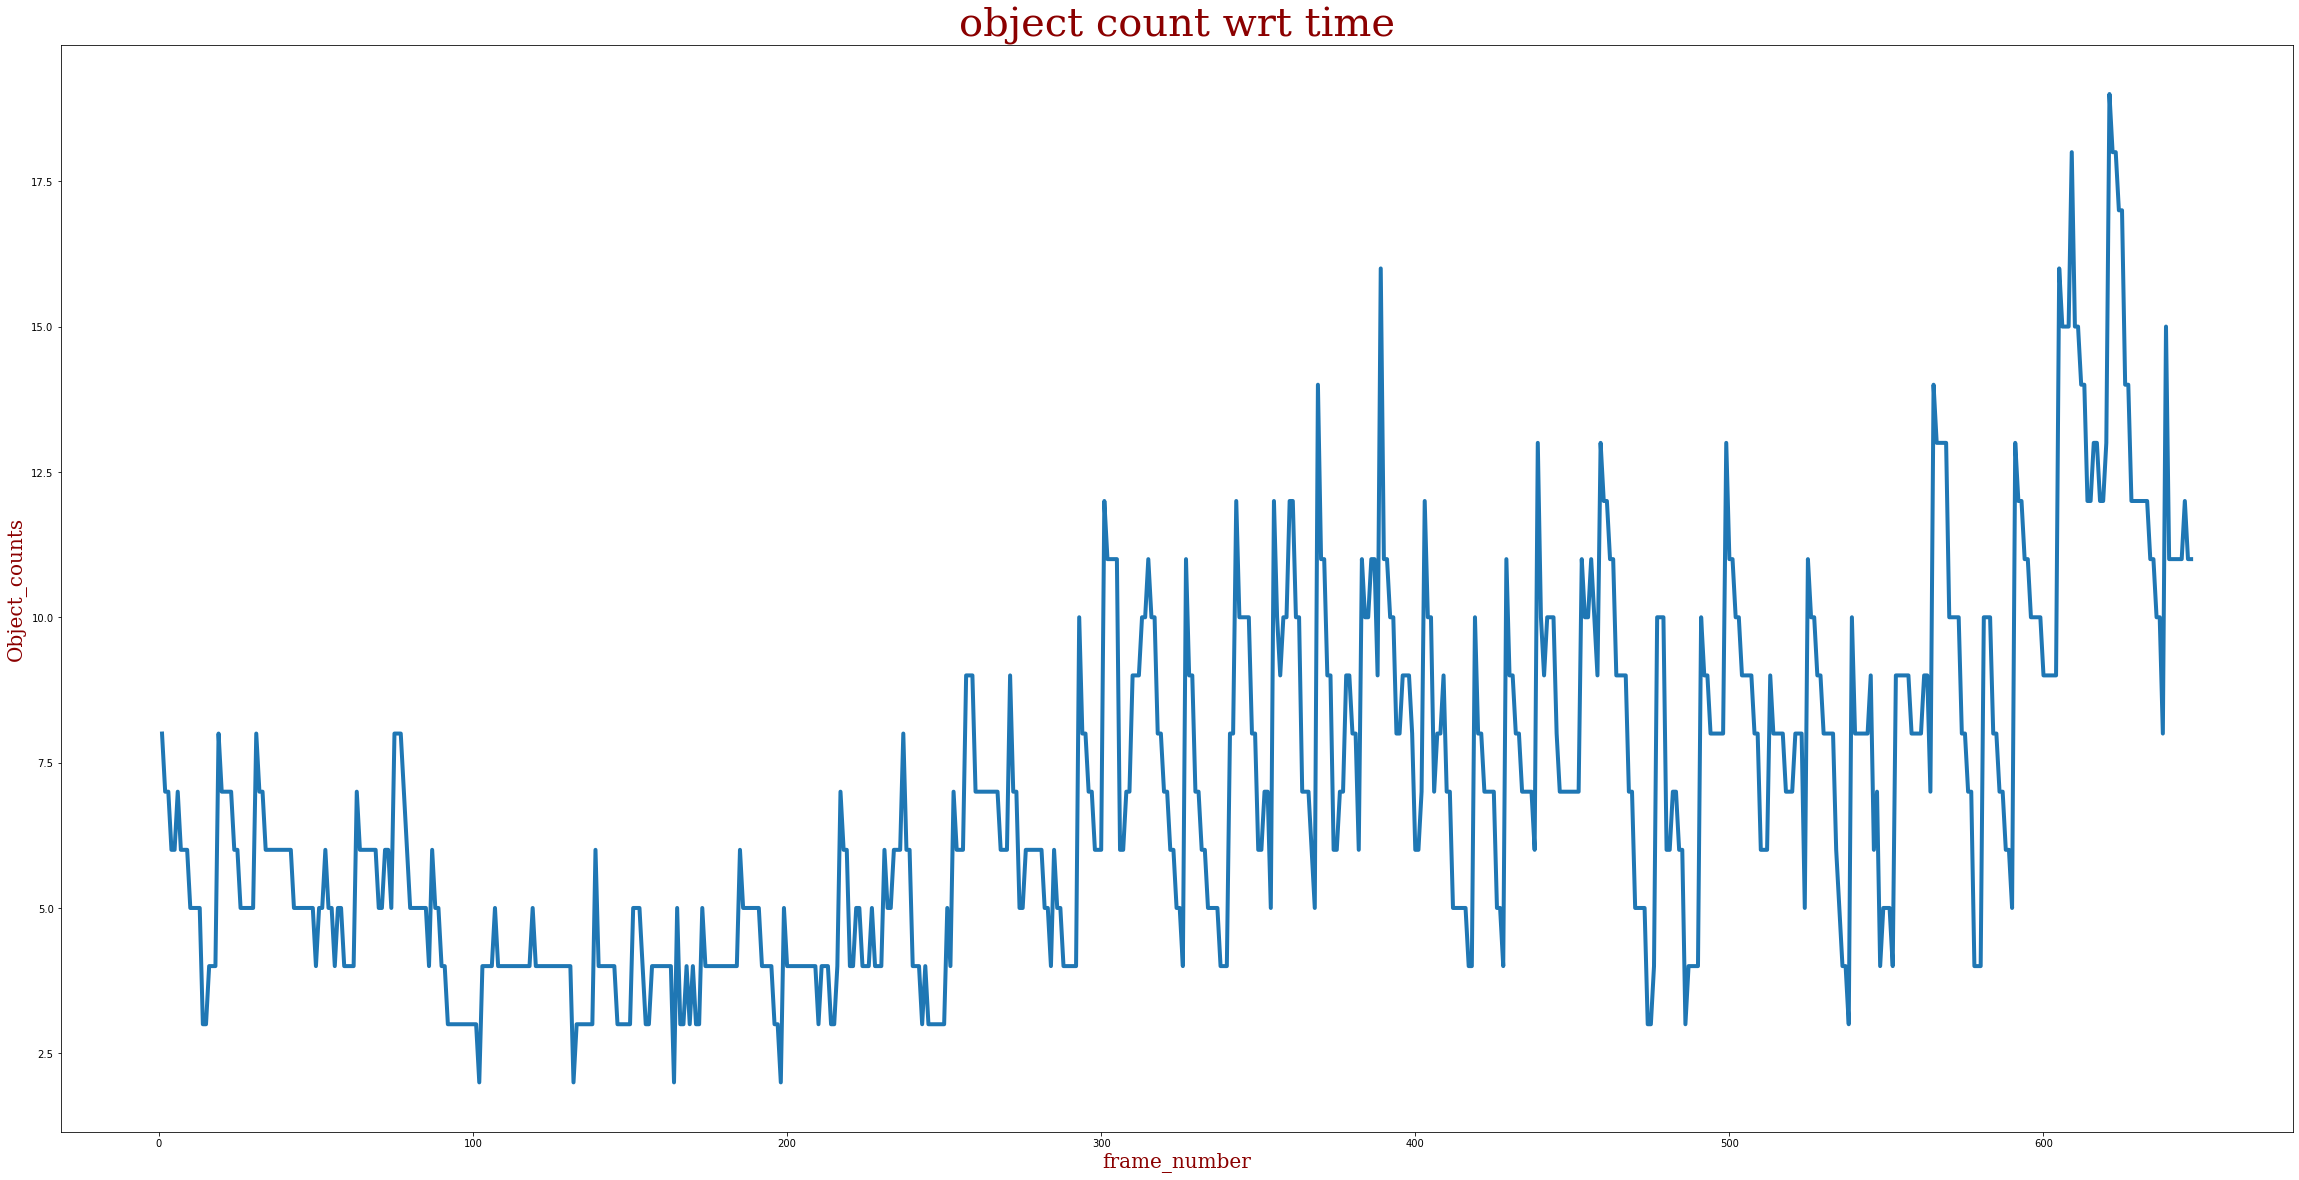

In [60]:
import matplotlib.pyplot as plt

#plt.ylabel("dfscc")
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 40,
        }
plt.figure(figsize=(40,20))
plt.plot(list(all_obj_counts.index),list(all_obj_counts),markersize=20,linewidth=4)
plt.ylabel("Object_counts",fontsize=20, fontdict=font)
plt.xlabel("frame_number",fontsize=20, fontdict=font)
plt.title("object count wrt time", fontdict=font)

In [ ]:
df_.filter()